# NETWORK INTRUSION DETECTION

## Problem Statement
With the enormous growth of computer networks usage and the huge increase in the number of applications running on top of it, network security is becoming increasingly more important. All the computer systems suffer from security vulnerabilities which are both technically difficult and economically costly to be solved by the manufacturers. Therefore, the role of Intrusion Detection Systems (IDSs), as special-purpose devices to detect anomalies and attacks in the network, is becoming more important. The research in the intrusion detection field has been mostly focused on anomaly-based and misusebased detection techniques for a long time. While misuse-based detection is generally favored in commercial products due to its predictability and high accuracy, in academic research anomaly detection is typically conceived as a more powerful method due to its theoretical potential for addressing novel attacks.Conducting a thorough analysis of the recent research trend in anomaly detection, one will encounter several machine learning methods reported to have a very high detection rate of 98% while keeping the false alarm rate at 1%. However, when we look at the state of the art IDS solutions and commercial tools, there is no evidence of using anomaly detection approaches, and practitioners still think that it is an immature technology. To find the reason of this contrast, lots of research was done done in anomaly detection and considered various aspects such as learning and detection approaches, training data sets, testing data sets, and evaluation methods.

The task is to build network intrusion detection system to detect anamolies and attacks in the 
network. There are two problems. 
1. Binomial Classification: Activity is normal or attack
2. Multinomial classification: Activity is normal or DOS or PROBE or R2L or U2R

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB , GaussianNB
import xgboost
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train=pd.read_table('Train.txt',sep=',')
data_test=pd.read_table('Test.txt',sep=',')

In [3]:
columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", 
"wrong_fragment","urgent","hot","num_failed_logins","logged_in", 
"num_compromised","root_shell","su_attempted","num_root","num_file_creations", 
"num_shells","num_access_files","num_outbound_cmds","is_host_login", 
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate", 
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", 
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [4]:
data_train.shape

(125972, 43)

In [5]:
data_test.shape

(22543, 43)

In [6]:
data_train.columns=columns
data_test.columns=columns

In [7]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [8]:
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


## Profile Report

In [9]:
#profile_report=ProfileReport(data)

In [10]:
#profile_report.to_file('profile_report.html')

In [11]:
data_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [12]:
data_train.num_outbound_cmds.value_counts()

0    125972
Name: num_outbound_cmds, dtype: int64

In [13]:
data_test.num_outbound_cmds.value_counts()

0    22543
Name: num_outbound_cmds, dtype: int64

In [14]:
#Removing the feature 'num_outbound_cmds' because of constant values in it
data_train.drop(columns='num_outbound_cmds',inplace=True)
data_test.drop(columns='num_outbound_cmds',inplace=True)

## Missing Value Treatment

In [15]:
data_train.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_c

## Check for Duplicate Rows

In [16]:
data_train.duplicated().sum()

0

## Scalling Continious Features

In [17]:
data_train.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate              

In [18]:
data_train.select_dtypes(include=['int64','float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.0,287.146929,2.604526e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125972.0,45567.100824,5.870354e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125972.0,19779.271433,4.021285e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125972.0,0.000198,1.408613e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.022688,2.535310e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.000111,1.436608e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.204411,2.149977e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125972.0,0.001222,4.523932e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.395739,4.890107e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125972.0,0.279253,2.394214e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [19]:
cont_cols=data_train.select_dtypes(include=['int64','float64']).columns

In [20]:
scaler = StandardScaler()
sc_train = scaler.fit_transform(data_train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(data_test.select_dtypes(include=['float64','int64']))

In [21]:
sc_traindf = pd.DataFrame(sc_train, columns = cont_cols)
sc_testdf = pd.DataFrame(sc_test, columns = cont_cols)

## Encoding Categorical Features

In [22]:
data_train.select_dtypes(include=['object']).head()

,protocol_type,service,flag,attack
0,udp,other,SF,normal
1,tcp,private,S0,neptune
2,tcp,http,SF,normal
3,tcp,http,SF,normal
4,tcp,private,REJ,neptune


In [23]:
data_train.protocol_type.value_counts()

tcp     102688
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [24]:
data_train.service.value_counts().count()

70

In [25]:
data_train.flag.value_counts().count()

11

In [26]:
#dropping feature 'service' because of high number of distinct values
data_train.drop(columns='service',inplace=True)
data_test.drop(columns='service',inplace=True)

In [27]:
data_train.select_dtypes(include=['object']).head()

,protocol_type,flag,attack
0,udp,SF,normal
1,tcp,S0,neptune
2,tcp,SF,normal
3,tcp,SF,normal
4,tcp,REJ,neptune


In [28]:
data_train.attack.value_counts()

normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

### Separating Target Variable

In [29]:
Y_train=data_train.attack.copy()
Y_test=data_test.attack.copy()

In [30]:
print(Y_train.shape,Y_test.shape)

(125972,) (22543,)


In [31]:
data_train.drop(columns=['attack'],inplace=True)
data_test.drop(columns=['attack'],inplace=True)

In [32]:
print(data_train.shape,data_test.shape)

(125972, 40) (22543, 40)


In [33]:
data_train.protocol_type.value_counts()

tcp     102688
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [34]:
data_train.flag.value_counts()

SF        74944
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64

In [35]:
train_cat=data_train.select_dtypes(include=['object'])
test_cat=data_test.select_dtypes(include=['object'])

In [36]:
# protocol_type feature mapping
pmap = {'icmp':0, 'tcp':1, 'udp':2}
train_cat['protocol_type'] = train_cat['protocol_type'].map(pmap)
test_cat['protocol_type'] = test_cat['protocol_type'].map(pmap)

In [37]:
# flag feature mapping
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10}
train_cat['flag'] = train_cat['flag'].map(fmap)
test_cat['flag'] = test_cat['flag'].map(fmap)

In [38]:
data_train.flag.value_counts()

SF        74944
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64

In [39]:
train_cat.flag.value_counts()

0     74944
1     34851
2     11233
3      2421
4      1562
6       365
5       271
7       127
8       103
9        49
10       46
Name: flag, dtype: int64

In [40]:
X_train=pd.concat([sc_traindf,train_cat],axis=1)
X_test=pd.concat([sc_testdf,test_cat],axis=1)

In [41]:
print(X_train.shape,X_test.shape)

(125972, 40) (22543, 40)


In [42]:
Y_train.value_counts()

normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [43]:
Y_test.value_counts()

normal             9711
neptune            4656
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
xterm                13
rootkit              13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
phf                   2
sqlattack             2
perl                  2
loadmodule            2
worm                  2
udpstorm              2
imap                  1
Name: attack, dtype: int64

In [44]:
def Y_encoding(feature):
    if feature=='normal':
        return 1
    elif feature in ['back','land','neptune','pod','smurf','teardrop','apache2','udpstorm','processtable','worm']:
        return 2
    elif feature in ['satan','ipsweep','nmap','portsweep','saint','mscan']:
        return 3
    elif feature in ['guess_passwd','ftp_write','imap','phf','multihop','warezmaster','warezclient','spy','xlock','xsnoop','snmpguess','snmpgetattack','httptunnel','sendmail','named']:
        return 4
    else:
        return 5
            

In [45]:
Y_train=Y_train.apply(lambda x : Y_encoding(x))
Y_test=Y_test.apply(lambda x : Y_encoding(x))

## Final X and Y Variables

In [46]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(125972, 40)
(22543, 40)
(125972,)
(22543,)


## Correlation Matrix

In [47]:
X_Y_train=pd.concat([X_train,Y_train],axis=1)

In [48]:
corr=X_Y_train.corr()

In [49]:
corr.to_excel('correlation.xlsx')

In [50]:
#Due to high correlation between some of the X variables(Multicollineirity), we can eliminate one of the variables from them.

In [51]:
# 'num_compromised' and 'num_root' is highly correlated corr= 0.998833452579197
# 'srv_serror_rate' and 'serror_rate' is highly correlated corr= 0.993289221195889
# 'srv_rerror_rate' and 'rerror_rate' is highly correlated corr= 0.989007640750548
# 'dst_host_serror_rate' and 'serror_rate' is highly correlated corr= 0.97937301627761
# 'dst_host_serror_rate' and 'srv_serror_rate' is highly correlated corr= 0.977595940313845
# 'dst_host_srv_serror_rate' and 'serror_rate' is highly correlated corr= 0.981138899594504
# 'dst_host_srv_serror_rate' and 'srv_serror_rate' is highly correlated corr= 0.986251673592385
# 'dst_host_rerror_rate' and 'rerror_rate' is highly correlated corr= 0.926748537274097
# 'dst_host_srv_rerror_rate' and 'rerror_rate' is highly correlated corr= 0.964448625753412
# 'dst_host_rerror_rate' and 'srv_rerror_rate' is highly correlated corr= 0.91782236269517
# 'dst_host_srv_rerror_rate' and 'srv_rerror_rate' is highly correlated corr= 0.970207964137131
# 'dst_host_srv_serror_rate' and 'dst_host_serror_rate' is highly correlated corr= 0.98505217622061
# 'dst_host_srv_rerror_rate' and 'dst_host_rerror_rate' is highly correlated corr= 0.924687925687878

In [52]:
X_train.drop(columns=['num_root','srv_serror_rate','srv_rerror_rate',
                      'dst_host_srv_serror_rate','dst_host_serror_rate',
                      'dst_host_rerror_rate','dst_host_srv_rerror_rate',
                      'dst_host_same_srv_rate'],inplace=True)
X_test.drop(columns=['num_root','srv_serror_rate','srv_rerror_rate',
                      'dst_host_srv_serror_rate','dst_host_serror_rate',
                      'dst_host_rerror_rate','dst_host_srv_rerror_rate',
                      'dst_host_same_srv_rate'],inplace=True)

## Feature Importance

### Recursive Feature Elimination

In [53]:
rfe=RFE(RandomForestClassifier(),n_features_to_select=15)

In [54]:
rfe=rfe.fit(X_train,Y_train)

In [55]:
rfe_cols=list(X_train.columns[rfe.support_])

In [56]:
rfe_cols

['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'last_flag',
 'protocol_type',
 'flag']

### Feature Importance from RF

In [57]:
rfc = RandomForestClassifier()

In [58]:
rfc=rfc.fit(X_train,Y_train)

In [59]:
rfc_cols=np.round(rfc.feature_importances_,3)

In [60]:
rfc_cols

array([0.004, 0.182, 0.089, 0.   , 0.007, 0.   , 0.005, 0.   , 0.031,
       0.005, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.066,
       0.031, 0.046, 0.01 , 0.083, 0.1  , 0.007, 0.017, 0.048, 0.059,
       0.052, 0.016, 0.058, 0.03 , 0.052])

In [61]:
imp_rf_df=pd.DataFrame(rfc_cols,index=X_train.columns).reset_index(drop=False).sort_values(by=0,ascending=False)

In [62]:
imp_rf_df.rename(columns={'index':'features',0:'importance'},inplace=True)
imp_rf_df

,features,importance
1,src_bytes,0.182
22,diff_srv_rate,0.100
2,dst_bytes,0.089
21,same_srv_rate,0.083
17,count,0.066
26,dst_host_diff_srv_rate,0.059
29,last_flag,0.058
31,flag,0.052
27,dst_host_same_src_port_rate,0.052
25,dst_host_srv_count,0.048


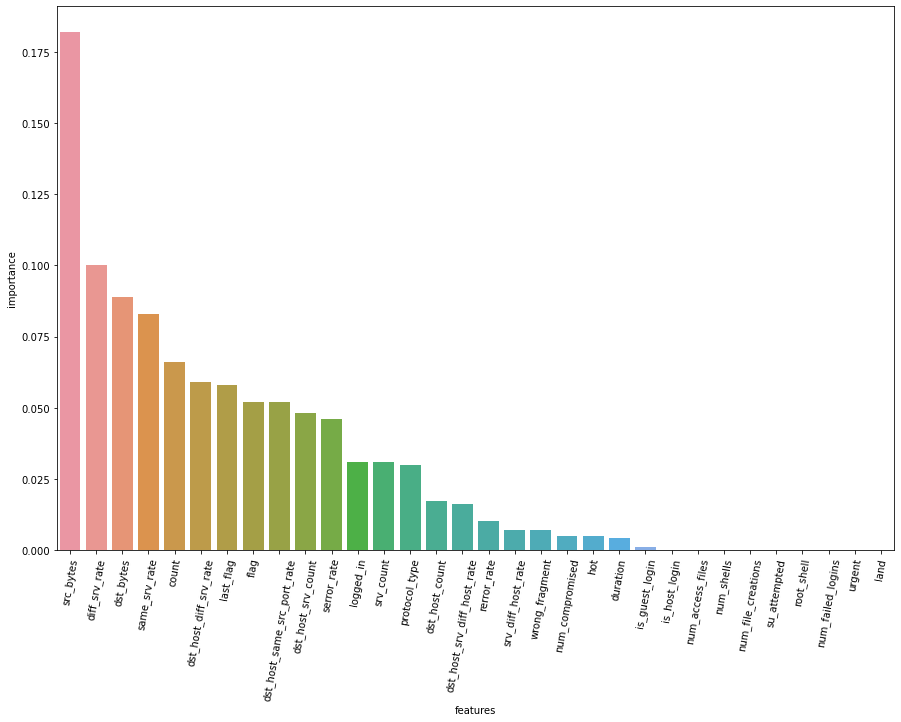

In [63]:
plt.figure(figsize=(15,10))
sns.barplot(x='features',y='importance',data=imp_rf_df,)
plt.xticks(rotation=80)
plt.show()

In [64]:
rfc_cols=list(imp_rf_df['features'].head(15))

In [65]:
rfc_cols

['src_bytes',
 'diff_srv_rate',
 'dst_bytes',
 'same_srv_rate',
 'count',
 'dst_host_diff_srv_rate',
 'last_flag',
 'flag',
 'dst_host_same_src_port_rate',
 'dst_host_srv_count',
 'serror_rate',
 'logged_in',
 'srv_count',
 'protocol_type',
 'dst_host_count']

In [66]:
#Combining Results
final_cols=list(set(rfe_cols+rfc_cols))

In [67]:
X_train=X_train[final_cols].copy()
X_test=X_test[final_cols].copy()

In [68]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(125972, 16)
(125972,)
(22543, 16)
(22543,)


## Modelling

### 1.Logistic Regression

In [69]:
lr=LogisticRegression()

In [70]:
lr=lr.fit(X_train,Y_train)

In [71]:
print("TRAIN ACCURACY OF LOGISTIC REGRESSION")
print('===============================================================')
print('Accuracy Score: ',metrics.accuracy_score(Y_train,lr.predict(X_train)))
print('===============================================================')
print('Confusion Matrix: ')
print(metrics.confusion_matrix(Y_train,lr.predict(X_train)))
print('===============================================================')
print('Classification Report: ')
print(metrics.classification_report(Y_train,lr.predict(X_train)))

TRAIN ACCURACY OF LOGISTIC REGRESSION
Accuracy Score:  0.962523417902391
Confusion Matrix: 
[[65488  1012   755    86     1]
 [ 1193 44353   334    47     0]
 [  830   130 10680    15     1]
 [   89    93    81   728     4]
 [    1     1     6    42     2]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.97      0.97      0.97     67342
           2       0.97      0.97      0.97     45927
           3       0.90      0.92      0.91     11656
           4       0.79      0.73      0.76       995
           5       0.25      0.04      0.07        52

    accuracy                           0.96    125972
   macro avg       0.78      0.72      0.74    125972
weighted avg       0.96      0.96      0.96    125972



In [72]:
print("TEST ACCURACY OF LOGISTIC REGRESSION")
print('===============================================================')
print('Accuracy Score: ',metrics.accuracy_score(Y_test,lr.predict(X_test)))
print('===============================================================')
print('Confusion Matrix: ')
print(metrics.confusion_matrix(Y_test,lr.predict(X_test)))
print('===============================================================')
print('Classification Report: ')
print(metrics.classification_report(Y_test,lr.predict(X_test)))

TEST ACCURACY OF LOGISTIC REGRESSION
Accuracy Score:  0.7289180676928536
Confusion Matrix: 
[[9018  460  233    0    0]
 [1193 5912   61    0    0]
 [ 423  507 1491    0    0]
 [1787  738  349   11    0]
 [ 304   38   10    8    0]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.71      0.93      0.80      9711
           2       0.77      0.83      0.80      7166
           3       0.70      0.62      0.65      2421
           4       0.58      0.00      0.01      2885
           5       0.00      0.00      0.00       360

    accuracy                           0.73     22543
   macro avg       0.55      0.47      0.45     22543
weighted avg       0.70      0.73      0.67     22543



### 2. K-Neighbors Classifier

In [73]:
knn=KNeighborsClassifier()

In [74]:
knn=knn.fit(X_train,Y_train)

In [75]:
print("TRAIN ACCURACY OF K-Neighbors Classifier")
print('===============================================================')
print('Accuracy Score: ',metrics.accuracy_score(Y_train,knn.predict(X_train)))
print('===============================================================')
print('Confusion Matrix: ')
print(metrics.confusion_matrix(Y_train,knn.predict(X_train)))
print('===============================================================')
print('Classification Report: ')
print(metrics.classification_report(Y_train,knn.predict(X_train)))

TRAIN ACCURACY OF K-Neighbors Classifier
Accuracy Score:  0.9983409011526371
Confusion Matrix: 
[[67270    15    30    27     0]
 [   20 45878    29     0     0]
 [   20    10 11621     3     2]
 [   26     1     4   961     3]
 [    7     1     4     7    33]]
Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     67342
           2       1.00      1.00      1.00     45927
           3       0.99      1.00      1.00     11656
           4       0.96      0.97      0.96       995
           5       0.87      0.63      0.73        52

    accuracy                           1.00    125972
   macro avg       0.96      0.92      0.94    125972
weighted avg       1.00      1.00      1.00    125972



In [76]:
print("TEST ACCURACY OF K-Neighbors Classifier")
print('===============================================================')
print('Accuracy Score: ',metrics.accuracy_score(Y_test,knn.predict(X_test)))
print('===============================================================')
print('Confusion Matrix: ')
print(metrics.confusion_matrix(Y_test,knn.predict(X_test)))
print('===============================================================')
print('Classification Report: ')
print(metrics.classification_report(Y_test,knn.predict(X_test)))

TEST ACCURACY OF K-Neighbors Classifier
Accuracy Score:  0.750210708423901
Confusion Matrix: 
[[9486   33  189    3    0]
 [1249 5865   52    0    0]
 [ 693  207 1521    0    0]
 [2429  251  165   40    0]
 [ 303   21    3   33    0]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.67      0.98      0.79      9711
           2       0.92      0.82      0.87      7166
           3       0.79      0.63      0.70      2421
           4       0.53      0.01      0.03      2885
           5       0.00      0.00      0.00       360

    accuracy                           0.75     22543
   macro avg       0.58      0.49      0.48     22543
weighted avg       0.73      0.75      0.70     22543



### 3. Decision Tree Classifier

In [77]:
dt=DecisionTreeClassifier()

In [78]:
dt=dt.fit(X_train,Y_train)

In [79]:
print("TRAIN ACCURACY OF Decision Tree Classifier")
print('===============================================================')
print('Accuracy Score: ',metrics.accuracy_score(Y_train,dt.predict(X_train)))
print('===============================================================')
print('Confusion Matrix: ')
print(metrics.confusion_matrix(Y_train,dt.predict(X_train)))
print('===============================================================')
print('Classification Report: ')
print(metrics.classification_report(Y_train,dt.predict(X_train)))

TRAIN ACCURACY OF Decision Tree Classifier
Accuracy Score:  1.0
Confusion Matrix: 
[[67342     0     0     0     0]
 [    0 45927     0     0     0]
 [    0     0 11656     0     0]
 [    0     0     0   995     0]
 [    0     0     0     0    52]]
Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     67342
           2       1.00      1.00      1.00     45927
           3       1.00      1.00      1.00     11656
           4       1.00      1.00      1.00       995
           5       1.00      1.00      1.00        52

    accuracy                           1.00    125972
   macro avg       1.00      1.00      1.00    125972
weighted avg       1.00      1.00      1.00    125972



In [80]:
print("TEST ACCURACY OF Decision Tree Classifier")
print('===============================================================')
print('Accuracy Score: ',metrics.accuracy_score(Y_test,dt.predict(X_test)))
print('===============================================================')
print('Confusion Matrix: ')
print(metrics.confusion_matrix(Y_test,dt.predict(X_test)))
print('===============================================================')
print('Classification Report: ')
print(metrics.classification_report(Y_test,dt.predict(X_test)))

TEST ACCURACY OF Decision Tree Classifier
Accuracy Score:  0.679501397329548
Confusion Matrix: 
[[8354  668  492  188    9]
 [1199 5501  410   56    0]
 [ 390  722 1266   41    2]
 [1684  501  503  197    0]
 [ 197  118   40    5    0]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.71      0.86      0.78      9711
           2       0.73      0.77      0.75      7166
           3       0.47      0.52      0.49      2421
           4       0.40      0.07      0.12      2885
           5       0.00      0.00      0.00       360

    accuracy                           0.68     22543
   macro avg       0.46      0.44      0.43     22543
weighted avg       0.64      0.68      0.64     22543



### 4. Random Forest Classifier

In [81]:
rf=RandomForestClassifier()

In [82]:
rf=rf.fit(X_train,Y_train)

In [83]:
print("TRAIN ACCURACY OF Random Forest Classifier")
print('===============================================================')
print('Accuracy Score: ',metrics.accuracy_score(Y_train,rf.predict(X_train)))
print('===============================================================')
print('Confusion Matrix: ')
print(metrics.confusion_matrix(Y_train,rf.predict(X_train)))
print('===============================================================')
print('Classification Report: ')
print(metrics.classification_report(Y_train,rf.predict(X_train)))

TRAIN ACCURACY OF Random Forest Classifier
Accuracy Score:  1.0
Confusion Matrix: 
[[67342     0     0     0     0]
 [    0 45927     0     0     0]
 [    0     0 11656     0     0]
 [    0     0     0   995     0]
 [    0     0     0     0    52]]
Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     67342
           2       1.00      1.00      1.00     45927
           3       1.00      1.00      1.00     11656
           4       1.00      1.00      1.00       995
           5       1.00      1.00      1.00        52

    accuracy                           1.00    125972
   macro avg       1.00      1.00      1.00    125972
weighted avg       1.00      1.00      1.00    125972



In [84]:
print("TEST ACCURACY OF Random Forest Classifier")
print('===============================================================')
print('Accuracy Score: ',metrics.accuracy_score(Y_test,rf.predict(X_test)))
print('===============================================================')
print('Confusion Matrix: ')
print(metrics.confusion_matrix(Y_test,rf.predict(X_test)))
print('===============================================================')
print('Classification Report: ')
print(metrics.classification_report(Y_test,rf.predict(X_test)))

TEST ACCURACY OF Random Forest Classifier
Accuracy Score:  0.7152552898904316
Confusion Matrix: 
[[9337   28  346    0    0]
 [1561 5095  510    0    0]
 [ 525  205 1691    0    0]
 [2686    2  197    0    0]
 [ 354    0    5    0    1]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.65      0.96      0.77      9711
           2       0.96      0.71      0.82      7166
           3       0.62      0.70      0.65      2421
           4       0.00      0.00      0.00      2885
           5       1.00      0.00      0.01       360

    accuracy                           0.72     22543
   macro avg       0.64      0.47      0.45     22543
weighted avg       0.66      0.72      0.66     22543



### 5. Naive Bayes Classifier

In [85]:
#Because Multinomial Naive Bayes Classifier does not allow negative values.
mm_scaler=MinMaxScaler()
mm_scaler_train=mm_scaler.fit_transform(X_train)
mm_scaler_test=mm_scaler.fit_transform(X_test)

In [86]:
X_train_mm_scaler=pd.DataFrame(mm_scaler_train,columns=X_train.columns)
X_test_mm_scaler=pd.DataFrame(mm_scaler_test,columns=X_test.columns)

In [87]:
mnb=MultinomialNB()

In [88]:
mnb=mnb.fit(X_train_mm_scaler,Y_train)

In [89]:
print("TRAIN ACCURACY OF Naive Bayes")
print('===============================================================')
print('Accuracy Score: ',metrics.accuracy_score(Y_train,mnb.predict(X_train_mm_scaler)))
print('===============================================================')
print('Confusion Matrix: ')
print(metrics.confusion_matrix(Y_train,mnb.predict(X_train_mm_scaler)))
print('===============================================================')
print('Classification Report: ')
print(metrics.classification_report(Y_train,mnb.predict(X_train_mm_scaler)))

TRAIN ACCURACY OF Naive Bayes
Accuracy Score:  0.8926825008732099
Confusion Matrix: 
[[64107   964  2271     0     0]
 [ 3733 42093   101     0     0]
 [ 2891  2512  6253     0     0]
 [  981    11     3     0     0]
 [   50     2     0     0     0]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.89      0.95      0.92     67342
           2       0.92      0.92      0.92     45927
           3       0.72      0.54      0.62     11656
           4       0.00      0.00      0.00       995
           5       0.00      0.00      0.00        52

    accuracy                           0.89    125972
   macro avg       0.51      0.48      0.49    125972
weighted avg       0.88      0.89      0.89    125972



In [90]:
print("TEST ACCURACY OF Naive Bayes Classifier")
print('===============================================================')
print('Accuracy Score: ',metrics.accuracy_score(Y_test,mnb.predict(X_test_mm_scaler)))
print('===============================================================')
print('Confusion Matrix: ')
print(metrics.confusion_matrix(Y_test,mnb.predict(X_test_mm_scaler)))
print('===============================================================')
print('Classification Report: ')
print(metrics.classification_report(Y_test,mnb.predict(X_test_mm_scaler)))

TEST ACCURACY OF Naive Bayes Classifier
Accuracy Score:  0.6853125138623963
Confusion Matrix: 
[[9456   23  232    0    0]
 [1968 5144   54    0    0]
 [ 539 1033  849    0    0]
 [2751   28  106    0    0]
 [ 356    0    4    0    0]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.63      0.97      0.76      9711
           2       0.83      0.72      0.77      7166
           3       0.68      0.35      0.46      2421
           4       0.00      0.00      0.00      2885
           5       0.00      0.00      0.00       360

    accuracy                           0.69     22543
   macro avg       0.43      0.41      0.40     22543
weighted avg       0.61      0.69      0.62     22543



### 5. XGBOOST Classifier 

In [91]:
xgc=xgboost.XGBClassifier()

In [92]:
xgc=xgc.fit(X_train,Y_train)

[01:12:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [93]:
print("TRAIN ACCURACY OF XGBoost Classifier")
print('===============================================================')
print('Accuracy Score: ',metrics.accuracy_score(Y_train,xgc.predict(X_train)))
print('===============================================================')
print('Confusion Matrix: ')
print(metrics.confusion_matrix(Y_train,xgc.predict(X_train)))
print('===============================================================')
print('Classification Report: ')
print(metrics.classification_report(Y_train,xgc.predict(X_train)))

TRAIN ACCURACY OF XGBoost Classifier
Accuracy Score:  1.0
Confusion Matrix: 
[[67342     0     0     0     0]
 [    0 45927     0     0     0]
 [    0     0 11656     0     0]
 [    0     0     0   995     0]
 [    0     0     0     0    52]]
Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     67342
           2       1.00      1.00      1.00     45927
           3       1.00      1.00      1.00     11656
           4       1.00      1.00      1.00       995
           5       1.00      1.00      1.00        52

    accuracy                           1.00    125972
   macro avg       1.00      1.00      1.00    125972
weighted avg       1.00      1.00      1.00    125972



In [94]:
print("TEST ACCURACY OF XGBoost Classifier")
print('===============================================================')
print('Accuracy Score: ',metrics.accuracy_score(Y_test,xgc.predict(X_test)))
print('===============================================================')
print('Confusion Matrix: ')
print(metrics.confusion_matrix(Y_test,xgc.predict(X_test)))
print('===============================================================')
print('Classification Report: ')
print(metrics.classification_report(Y_test,xgc.predict(X_test)))

TEST ACCURACY OF XGBoost Classifier
Accuracy Score:  0.7203566517322451
Confusion Matrix: 
[[9292   32  387    0    0]
 [1870 5145  149    0    2]
 [ 461  178 1782    0    0]
 [2363    5  498    0   19]
 [ 288    0   52    0   20]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.65      0.96      0.77      9711
           2       0.96      0.72      0.82      7166
           3       0.62      0.74      0.67      2421
           4       0.00      0.00      0.00      2885
           5       0.49      0.06      0.10       360

    accuracy                           0.72     22543
   macro avg       0.54      0.49      0.47     22543
weighted avg       0.66      0.72      0.67     22543



# ===============HAPPY LEARNING===============